<a href="https://colab.research.google.com/github/sujanred22/DL_assignemnt/blob/main/DL_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

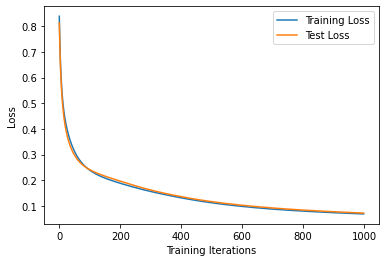

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
                                                                              
# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(in_features=2, out_features=16)
        self.fc2 = nn.Linear(in_features=16, out_features=1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return torch.sigmoid(x)

# Generate some training and test data
torch.manual_seed(42)
train_data = torch.randn(200, 2)
train_labels = ((train_data[:,0] > 0) & (train_data[:,1] > 0)).float().view(-1, 1)
test_data = torch.randn(100, 2)
test_labels = ((test_data[:,0] > 0) & (test_data[:,1] > 0)).float().view(-1, 1)

# Initialize the neural network and the optimizer
net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.1)

# Define the loss function
criterion = nn.BCELoss()

# Train the neural network
num_epochs = 1000
train_loss = []
test_loss = []
for epoch in range(num_epochs):
    # Forward pass
    output = net(train_data)
    loss = criterion(output, train_labels)

    # Backward pass and weight update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calculate training and test loss for plotting
    train_loss.append(loss.item())
    with torch.no_grad():
        test_output = net(test_data)
        test_loss.append(criterion(test_output, test_labels).item())

# Plot the training and test loss curves
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Training Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
